
# Basics for Linear Regression

This notebook reflects an introduction to linear regression using a univariate analysis generated with random noise.

### Define functions

We begin by creating a function that generates sample data with noise and returns the data split into labels and training data.

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# w: the coefficent for our one feature
# b: slope
# bound: interval for noise
def create_1d_data(num_examples, w, b, bound):
  np.random.seed(4)  # consistent random number generation
  X = np.arange(num_examples) #creates evenly spaced array of numbers
  deltas = np.random.uniform(low=-bound, high=bound, size=X.shape) # added noise
  Y = b + deltas + w * X

  return X, Y

---
### Data ingestion

In [8]:
# Define parameters
num_examples = 70
w = 2
b = 1
bound = 1

# Create data
X, Y = create_1d_data(70, 2, 1, 1)

# Print shapes
print('Printing shape of X:', X.shape)
print('Printing first 10 elements in X:', X[:10])
print('\nPrinting shape of Y:', Y.shape)
print('Printing first 10 elements in Y:', Y[:10])

Printing shape of X: (70,)
Printing first 10 elements in X: [0 1 2 3 4 5 6 7 8 9]

Printing shape of Y: (70,)
Printing first 10 elements in Y: [ 1.93405968  3.0944645   5.94536872  7.42963199  9.39545765 10.43217899
 13.95254891 14.01246051 16.50596472 18.86958306]


---
###  Data Preprocessing

Our objectives here involve adding one more feature to X and creating data partitions.

### <span style="color:chocolate"></span> Adding features


1. Add a column of $1s$ to $X$ (this will serve as an intercept or "bias" in our modeling task later on). Note: do not create a new array, just concatenate with the current values;
2. Print the shape of the array.

In [9]:
z = np.ones(len(X))
X = np.column_stack((X,z)) #column_stack // concatenate
print(X.shape)

(70, 2)


### <span style="color:chocolate"></span> Data splits

Using the <span style="color:chocolate">train_test_split()</span> method available in scikit-learn:
1. Split the (X,Y) data into training and test paritions by setting test_size=0.2 and random_state=1234. All the other arguments of the method are set to default values. Name the resulting arrays X_train, X_test, Y_train, Y_test;
2. Print the shape of each array.

In [10]:
# can create all 4 vars at the same time in scikit learn
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(56, 2)
(14, 2)
(56,)
(14,)


---
###  Exploratory data analysis (EDA)

### <span style="color:chocolate"></span> Plots

Create a side-by-side histogram for the values in Y_train and X_train. Make sure to include axes name and titles for each subplot.

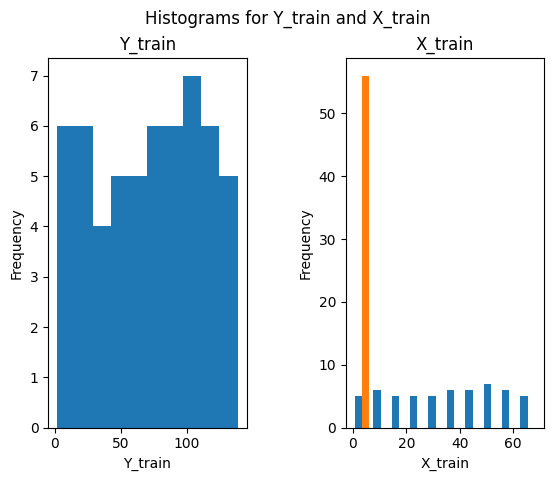

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Histograms for Y_train and X_train')
ax1.hist(Y_train)
ax1.set_title('Y_train')
ax1.set_xlabel('Y_train')
ax1.set_ylabel('Frequency')
ax2.hist(X_train)
ax2.set_title('X_train')
ax2.set_xlabel('X_train')
ax2.set_ylabel('Frequency')
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

---
###  Modeling

Let's start by considering two arbitrary models, one of them obviously subpar for demonstration reasons:
1. $M_1(x) = x$ + 5
2. $M_2(x) = 2x$ + 1

### <span style="color:chocolate"></span> Practice with Parameters

We can start by supplying a list of weights in the same order as B1, B0
(ie y = b0*x + b1)

In [12]:
M1_hat_train = np.dot(X_train, [1,5])
M2_hat_train = np.dot(X_train, [2,1])
print(M1_hat_train.shape)
print(M2_hat_train.shape)

(56,)
(56,)


### <span style="color:chocolate">Gradient Descent</span>

Next, we can apply gradient descent by creating a function that accepts the number of epochs and the learning rate as parameters to experiment on our models.

In [13]:
def gradient_descent(inputs, outputs, learning_rate, num_epochs):

  # m = number of examples, n = number of features
  m, n = inputs.shape

  # We'll use a vector of size n to store the learned weights and initialize
  # all weights to 1.
  W = np.ones(n)

  # Keep track of the training loss and weights after each step.
  losses = []
  weights = []

  for epoch in range(num_epochs):
    weights.append(W)
    predictions = np.dot(inputs, W).flatten()
    diff = predictions - outputs

    # our loss is a sum of squared differences, which we want to minimize
    loss = np.mean(diff ** 2)

    # Append the loss to the losses list
    losses.append(loss)

    # Compute the gradient with respect to the loss.
    gradient = (inputs * diff.reshape(m,1)) * 2
    gradient = np.mean(gradient, axis=0)

    # Update weights, scaling the gradient by the learning rate.
    W = W - (learning_rate * gradient)

  return np.array(weights), np.array(losses)



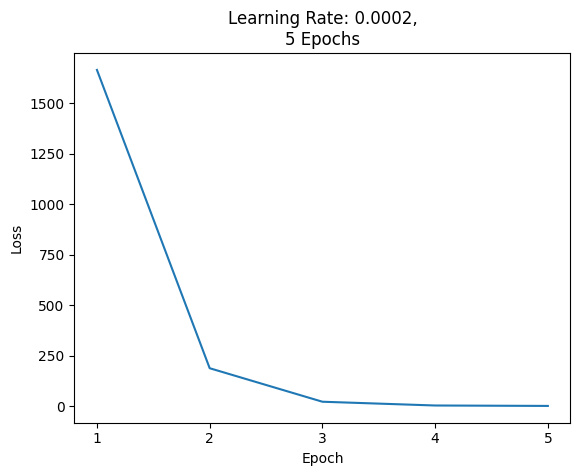

In [14]:
epochs = 5
rate = .0002

def plot_gradient_descent(num_epochs: int, rate: float, axObj):
  weights, losses = gradient_descent(
    X_train,
    Y_train,
    learning_rate=rate,
    num_epochs=num_epochs
  )

  epochs = np.arange(1,num_epochs+1)

  axObj.plot(epochs, losses)
  axObj.set_xlabel('Epoch')
  axObj.set_ylabel('Loss')
  axObj.set_title(f'Learning Rate: {rate},\n{num_epochs} Epochs')
  axObj.set_xticks(epochs)

  return {
      "final_loss": losses[-1],
      "final_weights": weights[-1]
  }

fig, (ax1) = plt.subplots(1,1)
plot_gradient_descent(epochs, rate, ax1)
plt.show()

---
###  Hyperparameter tuning

For added performance evaluation, we can adjust learning rates and epochs manually to get a better feel for hyperparameter tuning. Since this is purely introductory, we will not go through more than a few examples:

### <span style="color:chocolate"></span> Tuning hyperparameters

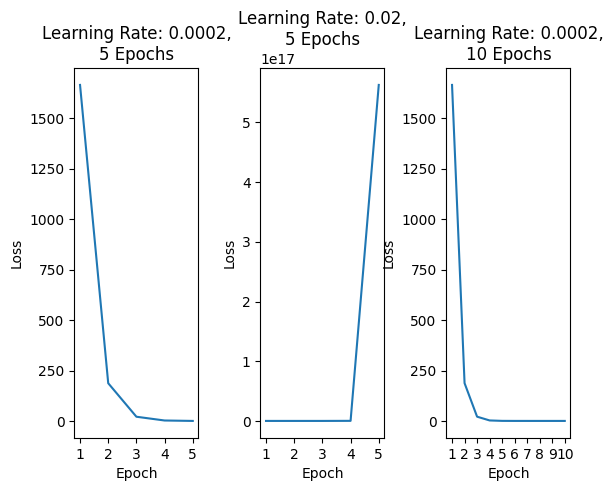

Loss for 5 epochs, lr = .0002 :: 0.5898109426970117
Loss for 5 epochs, lr = .02 :: 5.627343575809504e+17
Loss for 10 epochs, lr = .0002 :: 0.3244489580924425


In [15]:

fig, (ax1, ax2, ax3) = plt.subplots(1,3)
m1 = plot_gradient_descent(5, .0002, ax1)
m2 = plot_gradient_descent(5, .02, ax2)
m3 = plot_gradient_descent(10, .0002, ax3)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()
print("Loss for 5 epochs, lr = .0002 ::",m1['final_loss'])
print("Loss for 5 epochs, lr = .02 ::",m2['final_loss'])
print("Loss for 10 epochs, lr = .0002 ::",m3['final_loss'])

Our best model was model 3, which we can use to inspect the final weights.
Appropriately, these are fairly close y = 2x+1, which are the weights we used to generate our random dataset with noise at the beginning of this notebook.

In [ ]:
m3['final_weights']

array([2.00063055, 1.021434  ])

Therefore, the most performant model is:
$M_3(x)$ = 2.00063055*X + 1.021434

---
###  Evaluation and Generalization

To evaluate our models, we assess their performance based on how closely they fit the available data. In other words, we compare the true value $y$ with the predicted value $\hat{y}$ for each $x$.

### <span style="color:chocolate"></span> Computing MSE

Regardless, we can assess the MSE for each model:

In [ ]:

m1_weights = np.array([2,1])
m2_weights = np.array([1,5])
m3_weights = m3['final_weights']

m1_mse = mean_squared_error(Y_train, np.dot(X_train, m1_weights))
m2_mse = mean_squared_error(Y_train, np.dot(X_train, m2_weights))
m3_mse = mean_squared_error(Y_train, np.dot(X_train, m3_weights))

print("MSE for M1: ", m1_mse)
print("MSE for M2: ", m2_mse)
print("MSE for M3: ", m3_mse)

MSE for M1:  0.3280557752885262
MSE for M2:  1397.608983658733
MSE for M3:  0.3244489580924425


Using MSE as a loss function, we can conclude that Model 3 performs slightly better than than Model 1 and notably better than Model 2.

### <span style="color:chocolate"></span> Generalization

We can see how well models generalize by using them to predict test data and measuring performance:

In [ ]:

m1_mse = mean_squared_error(Y_test, np.dot(X_test, m1_weights))
m2_mse = mean_squared_error(Y_test, np.dot(X_test, m2_weights))
m3_mse = mean_squared_error(Y_test, np.dot(X_test, m3_weights))

print("MSE for M1: ", m1_mse)
print("MSE for M2: ", m2_mse)
print("MSE for M3: ", m3_mse)

MSE for M1:  0.2908006971666422
MSE for M2:  1113.6003911560044
MSE for M3:  0.29713927500107334


Based on MSE performance using test data, Model 1 generalizes the best.